# End-to-End 머신러닝 프로젝트

**1. 큰 그림 보기**

**2. 데이터 구하기**

**3. 데이터 탐색+시각화**

**4. 데이터 준비**

**5. 모델 선택하고 훈련**

**6. 모델 상세하게 조정**

**7. 솔루션 제시**

**8. 시스템 론칭, 모니터링, 유지보수**

# 1. 큰 그림 보기



## - 문제 정의

**- 지도학습/ 비지도학습/ 강화학습 중 어떤 경우인가?**

**- 분류문제인가, 회귀문제인가 (이 문제는 회귀문제)**

**- 배치학습, 온라인학습 중 어떤 것을 사용해야 하는가?**


## - 성능측정지표 선택

**- 평균제곱근 오차**



# 2. 데이터 가져오기

## - 작업환경 설정

## - 독립적인 환경 만들기


In [1]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message = "^internal gelsd")


In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubsercontent.com/ageron/handson-m12/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [3]:
import pandas as pd

housing_df = pd.read_csv('./housing.csv')

In [4]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.info() # 자세한 데이터 정보 확인 가능 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_df["ocean_proximity"].value_counts() # ocean_proximity: 범주형 필드

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing_df.describe() # describe() : 숫자형 특성의 정보를 요약

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


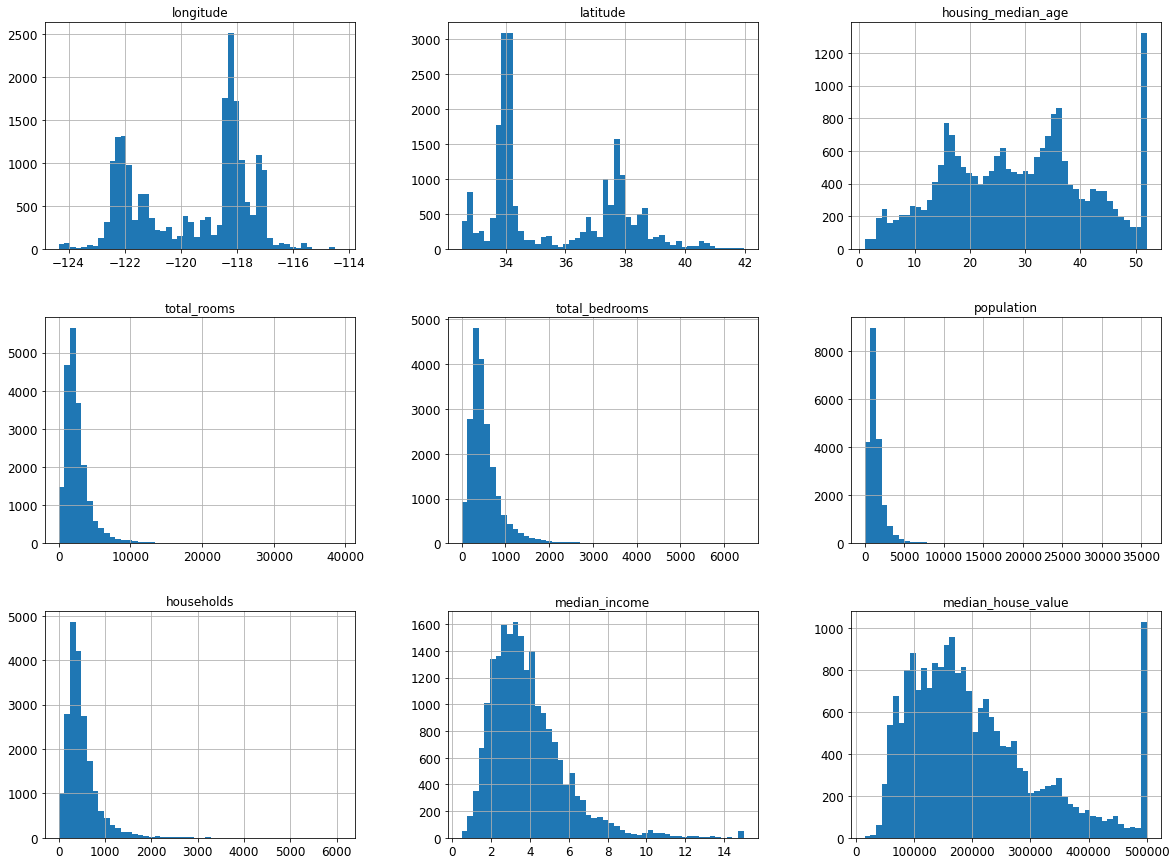

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20,15)) # hist(): 히스토그램 그리기 / bins: 가로축 '구간'의 개수 지정 / histtype: 히스토그램 종류 지정 
# figsize(가로길이, 세로길이) : 그래프 사이즈 설정
plt.savefig("attribute_histogram_plots")  # 그래프를 이미지 파일 등으로 저장
plt.show()


# 이 문제의 경우, 가장 큰 값으로 할당이 되어 있는 행들을 제외시키는게 도움이 됨

# 테스트 데이터셋 만들기

## 좋은 모델을 만들기 위해서는 모델평가만을 위해서 사용될 "테스트 데이터셋"을 따로 구분하는 것이 필요하다. 테스트 데이터셋을 별도로 생성할 수도 있지만, 프로젝트 초기의 경우 하나의 데이터셋을 훈련, 테스트용으로 분리하는 것이 일반적이다

In [9]:
import numpy as np
np.random.seed(42) # 랜덤 시드 설정. 이 노트북 결과가 매 실행마다 동일하도록 하기 위해

In [10]:
import numpy as np

# 주어진 데이터를 가지고 주어진 ratio에 대해서 test 데이터 set으로 뽑아내는 함수 만들기
 
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 임의의 순열을 리스트로 나타내줌
    test_set_size = int(len(data)*test_ratio) # 전체 데이터의 몇 퍼센트에 해당하는가
    test_indices = shuffled_indices[:test_set_size] # 처음 일부는 test
    train_indices = shuffled_indices[test_set_size:] # 나머지 모두는 train
    return data.iloc[train_indices], data.iloc[test_indices] #데이터프레임.iloc[행 인덱스, 열 인덱스]: 행 인덱스나 열 인덱스를 지정해주어 특정 값을 추출

In [11]:
train_set, test_set = split_train_test(housing_df, 0.2) # 원하는 만큼의 ratio 전달. 여기서는 20% 전달
len(train_set), len(test_set)

(16512, 4128)

- 위 방법의 문제점은 test 데이터를 뽑아내는 작업을 여러번 하게 된다는 것이다
- 해결방법으로 각 샘플의 식별자(identifier)를 사용해서 분할하는 방법이 있다

In [12]:
from zlib import crc32 

# crc32: 해싱 함수
# 해싱: 데이터를 아주 빠르게 삽입하거나 가져올 때 사용하는 기법

def test_set_check(identifier, test_ratio): # 식별자와 ratio가 주어졌을 때
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 # &: bitwise의 and function / 0xffffffff: 2의32승-1
# identifier 값을 해싱한 후 2의32승으로 나눈 나머지 < ratio * 2의 32승 일 때, 이를 테스트 데이터에 속한다고 판단한다.

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [120]:
housing_df_with_id = housing_df.reset_index() # index 칼럼을 추가
train_set, test_set = split_train_test_by_id(housing_df_with_id, 0.2, "index") # 20%의 데이터를 테스트 데이터로 구별. 열 이름은 index

- 위 방법의 문제점은 행 번호가 바뀌게 될 수도 있다는 점이다.
- id를 만드는 데 안전한 feature들을 사용해야 한다.

In [121]:
housing_df_with_id.head() # index가 새로 추가됨

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [122]:
housing_df_with_id["id"] = housing_df["longitude"] * 1000 + housing_df["latitude"]
train_set, test_set = split_train_test_by_id(housing_df_with_id, 0.2, "id") # id 추가

In [123]:
train_set.head() # id 추가됨

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,-122212.15


In [124]:
test_set.head() # id 추가됨

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,2,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,3,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,5,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,1,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,2,-122252.20


In [126]:
# 사이킷런에서 제공하는 데이터 분할 함수: train_test_split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size = 0.2, random_state=42)

# 계층적 샘플링

- 전체 데이터를 계층이라는 동질의 그룹으로 나누고, 테스트 데이터가 전체 데이터를 잘 대표하도록 각 계층에서 올바른 수의 샘플을 추출

<AxesSubplot:>

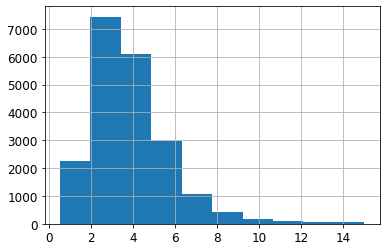

In [127]:
housing_df["median_income"].hist()

In [128]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                  labels = [1,2,3,4,5])
# cut: 같은 길이로 구간 나누기
#0 ~ 1.5 가 하나의 캐터고리 / 1.5 ~ 3.0이 하나의 캐터고리 ........


In [129]:
housing_df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

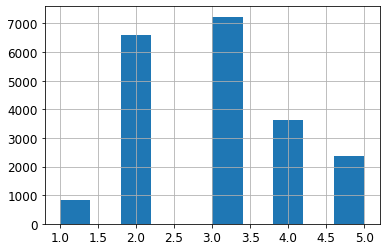

In [130]:
housing_df["income_cat"].hist()

In [131]:
# StratifiedShuffleSplit : 사이킷런 모듈로서 계층적 샘플링을 진행할 수 있음

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    start_train_set = housing_df.loc[train_index]
    start_test_set = housing_df.loc[test_index]
#데이터프레임.loc["행", "열"] -> 지정한 행과 열의 데이터를 가져온다. 리스트나 리스트 슬라이싱을 인자로 넣어도 된다. 
#데이터프레임.iloc[행 인덱스, 열 인덱스] -? loc 처럼 행과 열의 이름을 그대로 쓰는 것이 아니라 ,인덱스를 씀

In [132]:
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [133]:
start_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [134]:
housing_df["income_cat"].value_counts() / len(housing_df) #전체 데이터에서의 비율 

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

# 랜덤하게 샘플링할 때랑 계층적으로 샘플링할 때랑 비교 
# -> 계층적 샘플링 했을 때가 랜덤하게 샘플링 할 때 보다 에러 값이 훨씬 작음

# 탐색과 시각화

In [135]:
# 데이터 복사본
housing = start_train_set.copy()

# 지리적 데이터 시각화

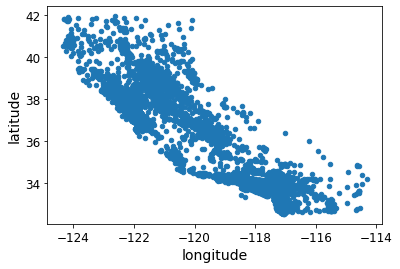

In [136]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot")

# 밀집된 영역 표시
- alpha 옵션

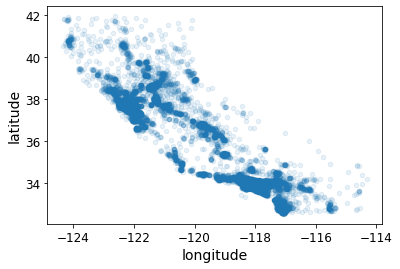

In [137]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha를 0.1로 두어 좀 더 나은 시각화결과
plt.savefig("better_visualization_plot")

# 더 다양한 정보 표시

- s: 원의 반지름 => 인구
- c: 색상 => 가격

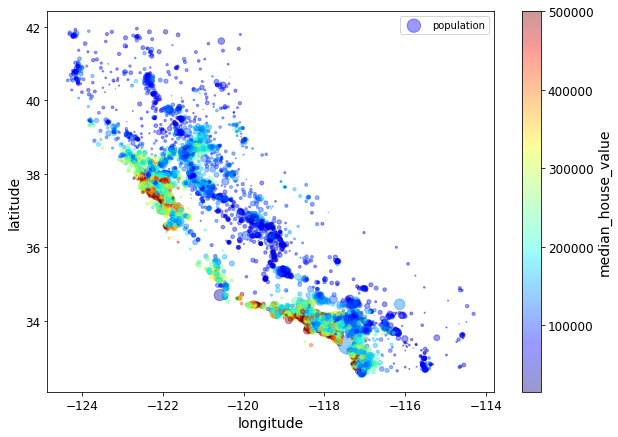

In [138]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
# cmap: 컬러맵
# sharex: 모든 서브플롯이 같은 x축 눈금을 사용하도록 xlim을 조정하면 모든 서브플롯에 조정
# sharey : 모든 서브플롯이 같은 y축 눈금을 사용하도록 ylim을 조정하면 모든 서브플롯에 조정

plt.legend() # 범례 추가
plt.savefig("housing_prices_scatterplot")

In [139]:
# 대도시는 집값이 높음 (빨간점)

# 상관관계 관찰하기

In [140]:
corr_matrix = housing.corr()

In [141]:
corr_matrix["median_house_value"].sort_values(ascending=False) 
# corr 값은 -1에서 1까지 범위. 1에 가까울수록 강한 양의 상관관계. -1에 가까울수록 강한 음의 상관관계. 0에 가까울수록 두 변수가 크게 상관없다.

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [142]:
# 위쪽으로 올라갈수록 집값이 내려가는 경향. 하지만 그렇다고 이 경향이 무조건 맞지는 않음

# Scatter_matrix 사용해서 상관관계 확인하기

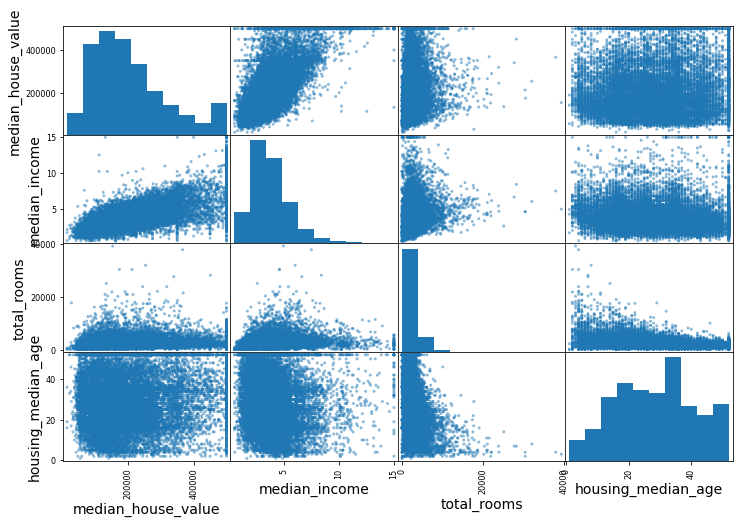

In [143]:
from pandas.plotting import scatter_matrix

# 특성 일부
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.savefig("scatter_matrix_plot")

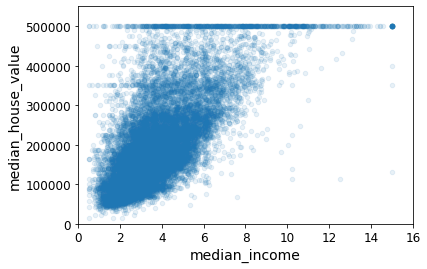

In [144]:
# 확대하여 살펴보기
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0,16,0,550000])
plt.savefig("income_vs_house_value_scatterplot")

# 특성 조합들 실험
 - 여러 특성들의 조합으로 새로운 특성을 정의해볼 수 있음

In [145]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] # per: ~당
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # per: ~당
housing["population_per_household"] = housing["population"]/housing["households"] # per: ~당


In [146]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [147]:
# 집이 클 수록 비싸므로 rooms_per_household가 양의 상관관계가 높음
# 한 집에 있는 방들 중에서 침실이 차지하는 비율: 집이 클 수록 침실이 차지하는 비율이 작아짐. 즉, bedrooms_per_room은 음의 상관관계가 높음

# 머신러닝 알고리즘을 위한 데이터 준비

데이터 준비는 데이터 변환 과정으로 볼 수 있다

데이터 수동변환 vs 자동변환(함수만들기)

데이터 자동변환 장점들
 - 새로운 데이터에 대한 변환을 손쉽게 재생산 할 수 있음
 - 향후에 재사용할 수 있는 라이브러리를 구축
 - 실제 시스템에서 가공되지 않은 데이터를 알고리즘에 쉽게 입력으로 사용할 수 있도록 해줌
 - 여러 데이터 변환 방법을 쉽게 시도해 볼 수 있음
 

In [148]:
housing = start_train_set.drop("median_house_value", axis=1) # median_house_value 피처를 따로 빼내서
housing_labels = start_train_set["median_house_value"].copy() # housing_labels에 따로 저장한다

# 데이터 정제

누락된 특성 다루는 방법들
- 해당 구역을 제거(행 제거)
- 해당 특성을 제거(열 제거)
- 어떤 값으로 채움(평균, 중간값, 0 등)

In [149]:
housing.isnull().any(axis=1)

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [150]:
# missing value를 가지고 있는 행 추출
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [151]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # dropna: 1개라도 NaN값이 있는 행을 제거할 수 있음(여기서는 행이 모두 제거됨)
# subset: 데이터프레임에서 부분집합을 뽑아 내는 것
# 여기서는 행제거

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [152]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # drop: 행, 열 삭제
# 여기서는 열제거

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5


In [153]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # fillna: 결측값 채우기 / inplace=True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다
# 여기서는 중간값으로 채움

In [154]:
median

433.0

In [155]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,5


# SimpleImputer
## : Nan 값을 채울 때 사용. fillna 보다 자유도가 떨어지지만 간단하게 값을 채울 수 있음

In [156]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #strategy: 행위, 알고리즘


In [157]:
# 중간값은 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 제외한 복사본을 생성
housing_num = housing.drop("ocean_proximity", axis=1)

In [158]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [159]:
imputer.statistics_ # statistics: 통계 라이브러리. median함수가 statistics 라이브러리에 있다. 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [160]:
housing_num.median().values

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9516\3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [161]:
# 79, 80 번째 셀 둘 다 결과가 동일
# 학습된 imputer 객체를 사용해 누락된 값을 중간값으로 바꿀 수 있다. 

In [162]:
X = imputer.transform(housing_num) # transform(): 데이터프레임에서 특정한 열의 값을 수정하거나 추가할 때 사용가능

In [163]:
X

array([[-121.46  ,   38.52  ,   29.    , ...,  706.    ,    2.1736,
           2.    ],
       [-117.23  ,   33.09  ,    7.    , ...,  768.    ,    6.3373,
           5.    ],
       [-119.04  ,   35.37  ,   44.    , ...,  300.    ,    2.875 ,
           2.    ],
       ...,
       [-122.72  ,   38.44  ,   48.    , ...,  172.    ,    3.1797,
           3.    ],
       [-122.7   ,   38.31  ,   14.    , ...,  501.    ,    4.1964,
           3.    ],
       [-122.14  ,   39.97  ,   27.    , ...,  197.    ,    3.1319,
           3.    ]])

In [164]:
# 위의 array를 dataframe으로

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [165]:
sample_incomplete_rows.index.values # missing value를 가지고 있는 행들의 인덱스들을 추출

array([ 1606, 10915, 19150,  4186, 16885], dtype=int64)

In [166]:
housing_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,5


# imputer 클래스를 사용하면 fit, transform 이 두가지 함수를 통해 median 값을 계산하고, 주어진 데이터들을 median 값들을 사용해서 missing value들을 채워넣을 수 있음.  

# Estimator, Transformer, Predictor

**- 추정기(Estimator): 데이터셋을 기반으로 모델 파라미터들을 추정하는 객체(imputer 등). 추정 자체는 fit()에 의해 수행되고, 하나의 데이터셋을 매개변수로 전달받음**


**- 변환기(Transformer): (imputer길이) 데이터 셋을 변환하는 추정기. 변환은 transform()이 수행, 그리고변환된 데이터셋을 반환함**


**- 예측기(Predictor): 일부 추정기는 주어진 새로운 데이터셋에 대해 예측값을 생성할 수 있음, LinearRegression도 예측기. predict()로 새로운 데이터셋을 받아 예측값을 반환.score()는 예측값에 대한 평가지표를 반환**

# 텍스트와 범주형 특성 다루기

In [167]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [168]:
from sklearn.preprocessing import OrdinalEncoder #OrdinalEncoder: 문자형을 숫자형으로 변환해줌
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # fit과 transform을 한번에
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [169]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이 표현방식의 문제점
 - "특성의 값이 비슷할수록 두 개의 샘플이 비슷하다"가 성립할 때 모델학습이 쉬워짐. 그런데 이 경우는 단순히 string에 의존한다.
 
 -**그래서 One-hot encoding 을 사용**

In [170]:
# OneHotEncoder: 카테고리를 원핫으로 변환

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# 위 출력을 보면 일반적인 배열이 아니고 "sparse matrix"임을 알 수 있다.

In [171]:
housing_cat_1hot.toarray() # toarray(): 리스트를 배열로 변경할 때 사용

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [172]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [173]:
cat_encoder = OneHotEncoder(sparse=False) # sparse=False 로 하면 sparse matrix가 아닌 일반적인 배열이 생성이 된다. (63 셀과 비교)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 나만의 변환기 만들기

 반드시 구현해야 할 method들
 - fit()
 - transform()
 
아래의 custom transformer는 rooms_per_household, population_per_household 두 개의 새로운 특성을 데이터셋에 추가하며, 
add_bedrooms_per_room=True로 주어지면 bedrooms_per_room 특성까지 추가한다. add_bedrooms_per_room은 하이퍼파라미터

In [174]:
from sklearn.base import BaseEstimator, TransformerMixin # -> 변환기 만들기(추정기 만들기 때도 사용)

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


Numpy 데이터를 DataFrame으로 변환

In [175]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


# 특성 스케일링(Feature Scaling)

- Min-max scailing: 0과 1 사이의 값이 되도록 조정
- 표준화: 평균이 0, 분산이 1이 되도록 만들어줌(사이킷런의 StandardScaler 사용)

# 변환 파이프라인(Transformation Pipelines)

- 여러 개의 변환이 순차적으로 이루어져야 할 경우 Pipeline class를 사용하면 편함.

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

이름, 추정기 쌍의 목록

마지막 단계를 제외하고 모두 변환기여야 한다.(fit_transform() method를 가지고 있어야 함).

파이프라인의 fit() method를 호출하면 모든 변환기의 fit_transform() method를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다. 마지막 단계에서는 fit() method만 호출한다

In [177]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

마지막 단계를 제외하고 모두 변환기여야 한다(fit_transform() method를 가지고 있어야 함).

파이프라인의 fit() method를 호출하면 모든 변환기의 fit_transform() method를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다. 마지막 단계에서는 fit() method만 호출한다

# 각 열마다 다른 파이프라인을 적용할 수도 있다. 


## example) ColumnTransformer 등을 사용하여 수치형 특성들과 범주형 특성들에 대해 별도의 변환을 할 수 있음

In [178]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [179]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [180]:
housing_prepared.shape, housing.shape

((16512, 17), (16512, 10))

.

# 모델 훈련

- 선형회귀모델(linear regression) 사용


In [181]:
#모델훈련 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) 



LinearRegression()

In [182]:
lin_reg.coef_ 
# 사이킷런은 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임. 사용자가 지정한 매개변수와의 구분을 위해서라고 함.
# coef: 계수 구하기

array([-54139.58491465, -55012.32828456,  14393.33063204,  -4049.36229827,
         8941.87946657, -44846.51561913,  44882.49837243,  63518.55059444,
        14172.96984216,   6474.1644335 ,    995.09082906,  10584.17934142,
       -19784.56918105, -55490.39468535, 114624.19653869, -24060.18401939,
       -15289.0486529 ])

In [183]:
len(lin_reg.coef_)

17

# 계수값이 크거나 작거나에 따라 어떤 식으로 모델에 영향을 미치는가

In [184]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(lin_reg.coef_, attributes), reverse=True) # 각각의 계수값들을 내림차순으로

[(114624.19653869147, 'ISLAND'),
 (63518.5505944449, 'median_income'),
 (44882.498372429596, 'households'),
 (14393.330632035264, 'housing_median_age'),
 (14172.969842157121, 'income_cat'),
 (10584.179341418678, 'bedrooms_per_room'),
 (8941.879466566417, 'total_bedrooms'),
 (6474.164433502518, 'rooms_per_hhold'),
 (995.0908290641246, 'pop_per_hhold'),
 (-4049.3622982696547, 'total_rooms'),
 (-15289.04865290154, 'NEAR OCEAN'),
 (-19784.569181047435, '<1H OCEAN'),
 (-24060.184019389624, 'NEAR BAY'),
 (-44846.51561913127, 'population'),
 (-54139.58491464717, 'longitude'),
 (-55012.32828455513, 'latitude'),
 (-55490.39468535281, 'INLAND')]

- 소득 높을수록 그 지역 집값이 높음
- 북쪽으로 갈수록 집값이 낮아지는 경향
- 계수값이 작다고 해서 영향이 아예 없는 것은 아님

In [185]:
# 몇 개의 샘플에 대해 데이터 변환 및 예측을 해보기
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared).round(decimals=1)) #round: 반올림 함수 / decimals: 십진수 기반의 연산

Predictions: [ 83811.1 314388.3 145641.9 183704.6 238729.7]


In [186]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


.

전체 훈련 데이터셋에 대한 RMSE(에러)를 측정해보기

In [187]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

훈련 데이터셋의 RMSE가 이 경우처럼 큰 경우 => 과소적합

과소적합이 일어나는 이유
 - 특성들이 충분한 정보를 제공하지 못함
 - 모델이 충분히 강력하지 못함

.

강력한 비선형 모델인 DecisionTreeRegressor를 사용해보자


In [188]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [189]:
# 예측

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

위 모델에서는 에러가 없음(0.0)

하지만 위 모델이 선형모델보다 낫다고 말할수 있을까? 이를 어떻게 알까?
 - 테스트 데이터셋을 이용한 검증
 - 훈련 데이터셋의 일부를 검증데이터셋으로 분리해서 검증
 - k-겹 교차 검증(k-fold cross-validation_

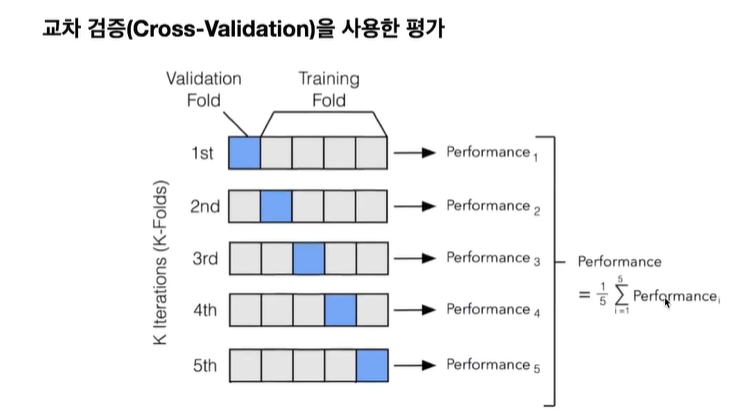

도출된 5개의 에러값의 평균이 교차 검증을 통해 얻을 수 있는 에러 값임

.

In [190]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10) #cv: 교차검증. 여기서는 10개 폴드
tree_rmse_scores = np.sqrt(-scores)

**cross_val_score** 
: 기존에 폴드 세트를 지정하고, for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출하고, 반복적으로 학습과 예측을 수행하는 일련의 과정을 한번에 수행해주는 API

In [191]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


10번 학습했으므로 10개의 값

,

선형회귀모델에 대한 평가

In [192]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


decision tree 모델의 평균적인 에러(약 71275)보다 선형 모델의 평균적인 에러(약 68897)가 더 낮음.

-> **선형모델이 decision tree 모델보다 새로운 데이터가 들어왔을 때 더 잘할 확률이 높음**

.

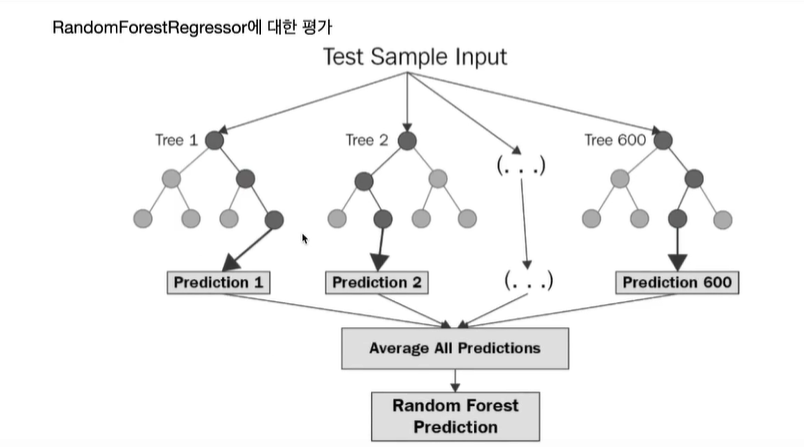

randomforest 모델이 하나의 트리를 쓰는 decision tree 모델보다 좋은 결과가 나오는 경우가 많음

In [193]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) 
# n_estimators: 트리를 몇 개 사용할 것인가를 결정
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [194]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # 학습데이터에 대한 에러

18675.224916252282

In [195]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
Mean: 50416.070431704204
Standard deviation: 2201.612779754884


평균에러가 약 50000. **위의 decision tree와 선형회귀모델의 평균에러 보다 낮음.**
-> **randomforest 모델이 셋 중에서 제일 좋음**

.

In [196]:
from sklearn.model_selection import GridSearchCV #그리드 탐색

param_grid = [
    # 하이퍼파라미터들의 3*4 조합들을 시도
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # 그리고 하이퍼파라미터들의 2*3 조합들을 시도. 부트스트랩 세트는 False로
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2,3,4]},
]
# 총 18가지 조합 시도(3*4+2*3)
forest_reg = RandomForestRegressor(random_state=42)
# 5 폴드의 교차검증 -> 모델을 학습하는 횟수는 총 5*(3*4+2*3) = 90
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [197]:
grid_search.best_params_ 
# 가장 좋은 모델을 만들어내는 조합을 알고자 할 때 사용

{'max_features': 6, 'n_estimators': 30}

In [198]:
grid_search.best_estimator_
# 이미 학습이 된 estimator

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [199]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

# 랜덤 탐색

하이퍼파라미터 조합의 수가 큰 경우에 유리. 지정한 횟수만큼만 평가.

In [200]:
from sklearn.model_selection import RandomizedSearchCV # 랜덤 탐색
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# n_iter : 몇 번을 시도할지 결정해줄수 있음.
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022566A09C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002256654AF40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [201]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


# 특성 중요도, 에러 분석

In [202]:
feature_importances = grid_search.best_estimator_.feature_importances_ # 특성 중요도
feature_importances

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])

In [203]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2437281550348665, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836558, 'INLAND'),
 (0.10060150315157557, 'pop_per_hhold'),
 (0.0676445808532661, 'longitude'),
 (0.06247448828832202, 'latitude'),
 (0.055692542877701, 'bedrooms_per_room'),
 (0.0515312129253161, 'rooms_per_hhold'),
 (0.04483496644921272, 'housing_median_age'),
 (0.01960462836331055, 'population'),
 (0.01826924231375522, 'total_rooms'),
 (0.018134587277114464, 'households'),
 (0.017844191166034768, 'total_bedrooms'),
 (0.013907738567035366, '<1H OCEAN'),
 (0.0053772472307463915, 'NEAR OCEAN'),
 (0.0026876599298535932, 'NEAR BAY'),
 (8.799692005595e-05, 'ISLAND')]

지금까지 학습데이터를 가지고 교차검증을 사용해서 모델의 성능을 평가하였음

# 테스트 데이터셋으로 최종 평가하기

In [204]:
final_model = grid_search.best_estimator_ # 최종 모델 결정

x_test = start_test_set.drop("median_house_value", axis=1)
y_test = start_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [205]:
final_rmse # 마지막으로 얻어진 에러값. 

48557.33618531538

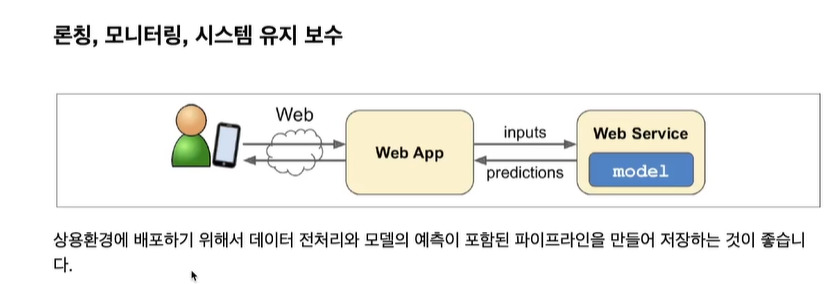

In [116]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 83811.08312039, 314388.27147935, 145641.85902864, 183704.64921202,
       238729.66725745])

In [117]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [206]:
my_model = full_pipeline_with_predictor

In [210]:
import joblib # joblib: 디스크 캐싱, 병렬 프로그래밍하거나, 학습한 모델을 저장할 수 있음
joblib.dump(my_model, "my_model.pk1")  # dump: 객체를 파일에 저장

my_model_loaded = joblib.load("my_model.pk1")

PicklingError: Can't pickle <class '__main__.CombinedAttributesAdder'>: it's not the same object as __main__.CombinedAttributesAdder

In [208]:
my_model_loaded.predict(some_data) # 데이터가 주어졌을 때 데이터 변환 할 수 있음

NameError: name 'my_model_loaded' is not defined

# 론칭 후 시스템 모니터링

 - 시간이 지나면 모델이 낙후되면서 성능이 저하
 - 자동모니터링: 추천시스템의 경우, 추천된 상품의 판매량이 줄어드는지?
 - 수동모니터링: 이미지 분류의 경우, 분류된 이미지들 중 일부를 전문가에게 검토시킴
 - 결과가 나빠진 경우: 데이터 입력의 품질이 나빠졌는지? 트렌드의 변화? 센서고장?

# 유지보수
 - 정기적으로 새로운 데이터 수집
 - 새로운 데이터를 테스트 데이터로, 현재의 테스트 데이터는 학습데이터로 편입
 - 다시 학습 후, 새로운 테스트 데이터에 기반해 현재 모델과 새 모델을 평가, 비교
 
# 전체 프로세스에 고르게 시간을 배분해야 한다!